## Initialize session

In [1]:
%pylab
from nugridpy import nugridse as mp
from nugridpy import mesa as ms
import numpy as np

data_dir="/data/nugrid_apod2"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## The MESA stellar evolution model
Initialise the 3 solar-mass Z=0.02 MESA stellar evolution model from set1.2 using the seeker method:

In [2]:
star_age = ms.star_log(mass=3,Z=0.02)
star = mp.se(mass=3,Z=0.02)

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 3.0
Using old star.logsa file ...
 reading ...100% 

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 3.0
Searching files, please wait.......
Reading preprocessor files
File search complete.


## Find the Red Giant Branch and Thermal Pulses

<IPython.core.display.Javascript object>


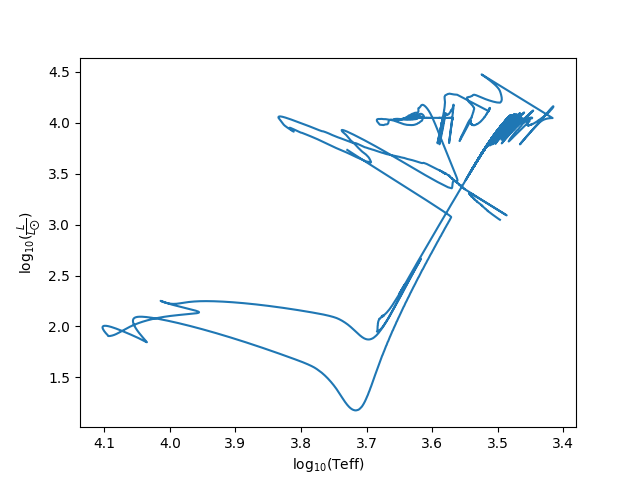

In [3]:
figure(1)
temp_surface = star_age.get('log_Teff')
luminosity = star_age.get('log_L')
plot(temp_surface[0:143000],luminosity[0:143000])
gca().invert_xaxis()
xlabel('log$_{10}$(Teff)')
ylabel(r"log$_{10}(\frac{L}{L_{\bigodot}})$")

<IPython.core.display.Javascript object>


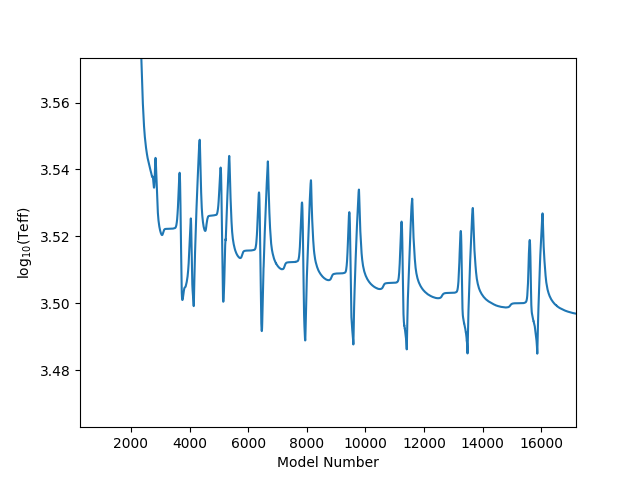

In [4]:
figure(2)
model = star_age.get('model_number')
plot(model,temp_surface)
xlabel('Model Number')
ylabel(r"log$_{10}$(Teff)")

#### First Thermal Pulse

* Just before the red giant (model # 2700)
* Minimum in surface temperature of thermal pulse "middle of pulse" (model # 3754)
* Maximum in surface temperature of thermal pulse "end of pulse" (model # 4350)

## Abundance Profiles

<IPython.core.display.Javascript object>


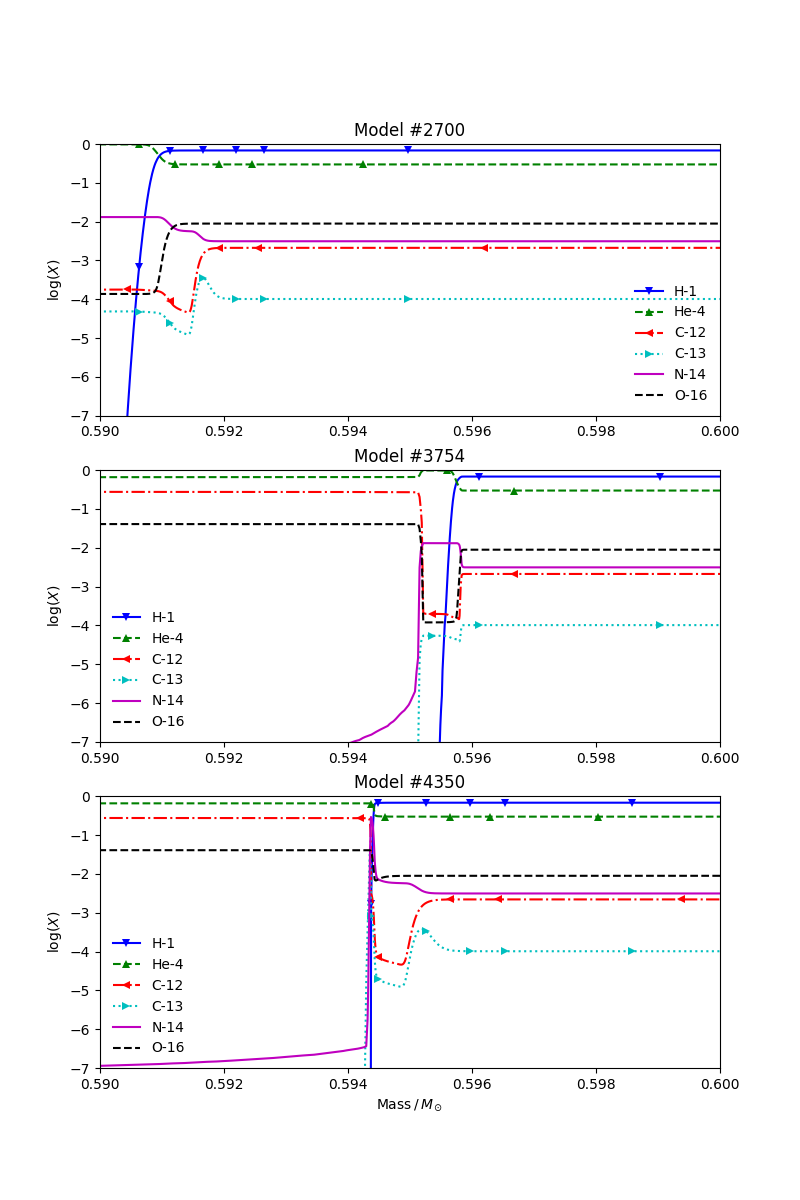

 reading ['iso_massf']...100%

In [7]:
# model numbers
before_pulse = 2700
middle_pulse = 3754
end_pulse = 4350

# species to look at
species=['H-1','He-4','C-12','C-13','N-14','O-16']

# create a plot of abundance profiles
fig = figure(10)
fig.set_size_inches(8,12)

# plot the first abundance profile
ax1 = fig.add_subplot(311)
star.abu_profile(isos=species, fname=before_pulse, logy=True)
ax1.set_ylim(-7,0)
ax1.set_xlim(0.59,0.6)
ax1.set_xlabel('')
ax1.set_title('Model #' + str(before_pulse))

ax2 = subplot(312, sharex=ax1)
star.abu_profile(isos=species, fname=middle_pulse, logy=True)
ax2.set_ylim(-7,0)
ax2.set_xlim(0.59,0.6)
ax2.set_xlabel('')
ax2.set_title('Model #' + str(middle_pulse))

ax3 = subplot(313, sharex=ax1)
star.abu_profile(isos=species, fname=end_pulse, logy=True)
ax3.set_ylim(-7,0)
ax3.set_xlim(0.59,0.6)
ax3.set_title('Model #' + str(end_pulse))


## Kippenhahn Diagrams
* Asymptotic Giant Branch is model numbers ~ 2200-2600

In [ ]:
star_age.kip_cont?

<IPython.core.display.Javascript object>


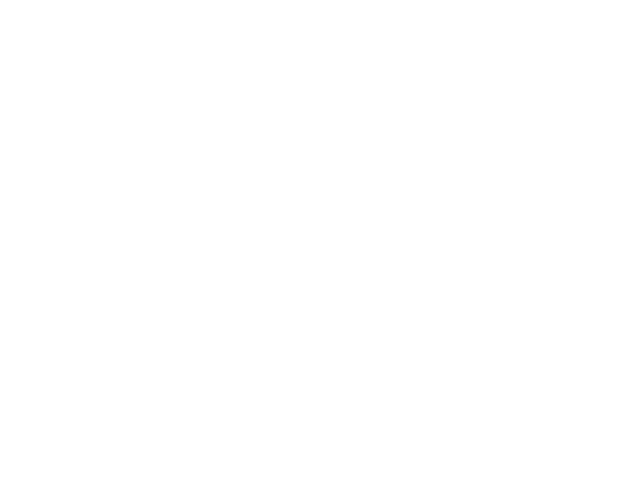

 creating color map1 ...100% 

 creating color map mix ...100% 

engenstyle was  twozone
mixstyle was  twozone

 finished preparing color map


<IPython.core.display.Javascript object>


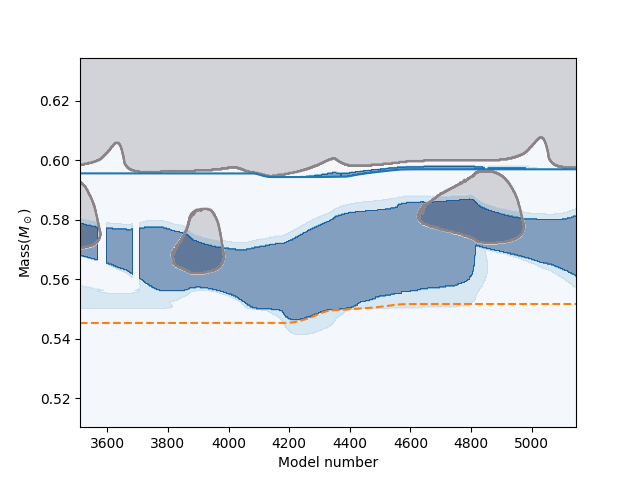

plot versus model number
plotting contours
plotting patches
plotting abund boundaries


In [6]:
ifig=107;close(ifig);figure(ifig)
star_age.kip_cont(xres=10000,yres=10000,modstart=2100, modstop=6000)